In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy import stats
import numpy as np

Salary_Data_df = pd.read_csv("Resources/salaries.csv")
Salary_Data_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,EN,FT,Machine Learning Engineer,36000,USD,36000,UG,100,US,M
1,2023,MI,FT,Research Engineer,300000,USD,300000,US,0,US,M
2,2023,MI,FT,Research Engineer,100000,USD,100000,US,0,US,M
3,2023,MI,FT,Research Engineer,300000,USD,300000,US,0,US,M
4,2023,MI,FT,Research Engineer,100000,USD,100000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
8123,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
8124,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
8125,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
8126,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [17]:
# Salary Avg. by year
Salary_by_year_average = Salary_Data_df.groupby(["work_year"])["salary_in_usd"].mean().astype(np.int64)
Salary_by_year_average


work_year
2020    102250
2021     99922
2022    134508
2023    155559
Name: salary_in_usd, dtype: int64

In [18]:
# count of salaries by year
Salary_by_year_count = Salary_Data_df.groupby(["work_year"]).count()["salary_in_usd"].reset_index(name="Count")
Salary_by_year_count


,work_year,Count
0,2020,75
1,2021,218
2,2022,1650
3,2023,6185


In [19]:
#combine
Table_for_plot = pd.merge(Salary_by_year_average, Salary_by_year_count, on=["work_year"], how= "outer")
Table_for_plot

,work_year,salary_in_usd,Count
0,2020,102250,75
1,2021,99922,218
2,2022,134508,1650
3,2023,155559,6185


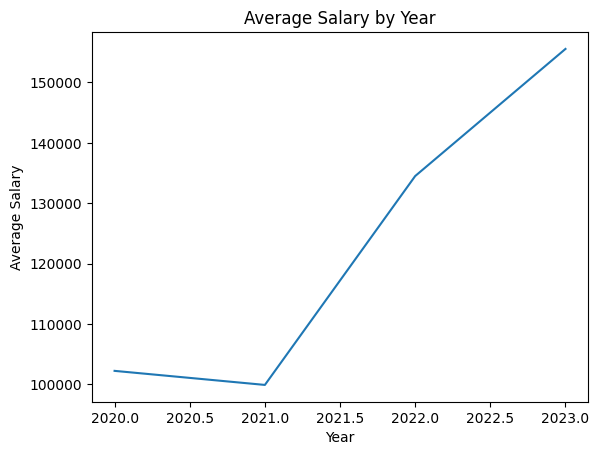

<Figure size 640x480 with 0 Axes>

In [20]:
Salary_by_year_average.plot(title="Average Salary by Year", xlabel="Year", ylabel="Average Salary")
plt.show()
plt.savefig("images/Fig6.png")

In [21]:
Experience_adjustment = Salary_Data_df.replace({"experience_level":{'EN':'Entry','SE':'Senior','MI':'Mid','EX':'Executive'}})
Salary_by_level_average = Experience_adjustment.groupby(["experience_level"])["salary_in_usd"].mean()
Salary_by_level_average.sort_values()


experience_level
Entry         85729.121839
Mid          114868.573048
Senior       161645.390369
Executive    189669.935743
Name: salary_in_usd, dtype: float64

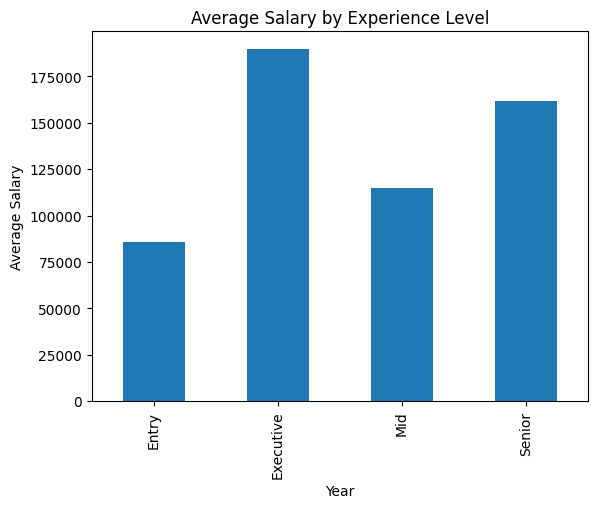

In [22]:
Salary_by_level_average.plot.bar(title="Average Salary by Experience Level", xlabel="Year", ylabel="Average Salary")
plt.show()
plt.savefig("Images/Fig7.png")